In [88]:
import numpy as np
import math
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
all_df=pd.read_excel('norm_trainDataset.xls', index_col=False)
target = all_df[all_df.columns[2]]
all_df.drop(all_df.columns[[0,2]], axis=1, inplace=True)
all_df.head()

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,41.0,0,0,0,1,3,3,1,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,39.0,1,1,0,0,3,3,1,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,31.0,0,0,0,1,2,1,1,0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,35.0,0,0,0,1,3,3,1,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,61.0,1,0,0,0,2,1,1,0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [4]:
target.head()

0    144.0
1    142.0
2    135.0
3     12.0
4    109.0
Name: RelapseFreeSurvival (outcome), dtype: float64

In [5]:
image_features = all_df[all_df.columns[11:]]
image_features.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0.666118,0.476173,20.715461,43.504095,51.971146,41.761226,36.400549,53.310412,14202.708330,28.978871,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,0.645083,0.594470,21.659822,36.435505,32.984845,40.447497,42.379240,44.384682,10858.375000,23.503921,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0.770842,0.501228,26.590504,53.050724,66.910388,44.944410,66.760767,69.000000,26748.208330,40.893735,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0.861035,0.750267,20.456571,27.265716,33.241540,30.594117,31.384710,35.042831,8846.541667,23.476732,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [6]:
standard_scalar = StandardScaler()
scaled_image_features = standard_scalar.fit_transform(image_features)

## PCA Analysis

Text(0.5, 1.0, 'RelapseFreeSurvival ')

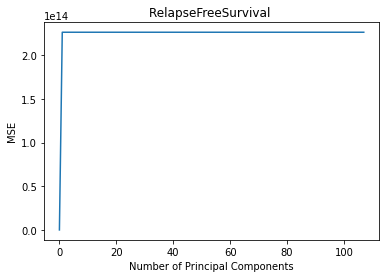

In [7]:
## Plot PCA variance for image features ## (code ref from https://www.statology.org/principal-components-regression-in-python/)

#define cross validation method (3 fold repeated 5 times)
cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=1)
mse = []

regr = LinearRegression()

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(image_features),1)), target, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(0, len(image_features.columns)):
    score = -1*model_selection.cross_val_score(regr,
               scaled_image_features, target, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('RelapseFreeSurvival ')

In [8]:
pca = PCA()
principalComponents = pca.fit_transform(scaled_image_features)

# shows percentage of variance in response 
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([32.68, 47.28, 59.54, 70.84, 77.04, 81.84, 84.99, 87.16, 89.13,
       90.43, 91.55, 92.62, 93.6 , 94.44, 95.15, 95.79, 96.39, 96.95,
       97.36, 97.65, 97.92, 98.13, 98.33, 98.5 , 98.66, 98.8 , 98.92,
       99.04, 99.15, 99.24, 99.33, 99.41, 99.48, 99.54, 99.59, 99.64,
       99.68, 99.72, 99.75, 99.78, 99.8 , 99.82, 99.84, 99.85, 99.86,
       99.87, 99.88, 99.89, 99.9 , 99.91, 99.92, 99.93, 99.94, 99.95,
       99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95,
       99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95,
       99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95,
       99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95,
       99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95,
       99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95])

In [9]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(scaled_image_features)
pca_image_features = pd.DataFrame(data = principalComponents
             , columns = ["pca "+str(i) for i in range(0, 10)])

pca_image_features.head()

,pca 0,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,pca 8,pca 9
0,12.601950,1.387681,0.670593,3.604461,3.562001,1.639343,1.433209,-1.100675,3.902872,-0.696188
1,-3.393079,-1.980501,-1.895269,1.771329,-1.404364,0.763655,-0.896444,-0.632014,0.501553,1.179868
2,-3.820526,-3.013099,-2.227040,1.917048,-0.756030,2.152747,0.766229,-0.269595,1.510277,2.044149
3,-6.294688,-1.590879,-1.903278,2.386962,-0.814978,0.497590,0.082940,-0.021006,1.379703,-0.358966
4,-2.261542,-3.719044,-2.126601,3.190680,-0.899545,2.047326,-1.098583,0.428868,0.033325,0.520582


In [10]:
patient_features = all_df[all_df.columns[:11]]
patient_features.head()

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage
0,1,41.0,0,0,0,1,3,3,1,1,2
1,0,39.0,1,1,0,0,3,3,1,1,2
2,1,31.0,0,0,0,1,2,1,1,0,2
3,0,35.0,0,0,0,1,3,3,1,1,3
4,0,61.0,1,0,0,0,2,1,1,0,2


In [11]:
pca_df = pd.concat([patient_features, pca_image_features], axis = 1)
pca_df.head()

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,pca 0,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,pca 8,pca 9
0,1,41.0,0,0,0,1,3,3,1,1,...,12.601950,1.387681,0.670593,3.604461,3.562001,1.639343,1.433209,-1.100675,3.902872,-0.696188
1,0,39.0,1,1,0,0,3,3,1,1,...,-3.393079,-1.980501,-1.895269,1.771329,-1.404364,0.763655,-0.896444,-0.632014,0.501553,1.179868
2,1,31.0,0,0,0,1,2,1,1,0,...,-3.820526,-3.013099,-2.227040,1.917048,-0.756030,2.152747,0.766229,-0.269595,1.510277,2.044149
3,0,35.0,0,0,0,1,3,3,1,1,...,-6.294688,-1.590879,-1.903278,2.386962,-0.814978,0.497590,0.082940,-0.021006,1.379703,-0.358966
4,0,61.0,1,0,0,0,2,1,1,0,...,-2.261542,-3.719044,-2.126601,3.190680,-0.899545,2.047326,-1.098583,0.428868,0.033325,0.520582


In [12]:
x_train, x_test, y_train, y_test = train_test_split(pca_df, target, test_size=0.15, random_state=42)

## Decision Tree Models

In [124]:
# note : criterion='poisson'
regr_1 = DecisionTreeRegressor(max_depth=2, random_state=42, criterion='absolute_error', max_features= 'sqrt' )
regr_2 = DecisionTreeRegressor(max_depth=5, random_state=42, criterion='absolute_error', max_features= 'sqrt')
regr_3 = DecisionTreeRegressor(max_depth=8, random_state=42, criterion='absolute_error', max_features= 'sqrt' )

In [125]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 42).fit(x_train, y_train)

In [138]:
rf_prediction = rf.predict(x_test)
rf_mae = mean_absolute_error(y_test, rf_prediction)
print(rf_mae)

23.461541792327594


In [128]:
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
regr_3.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      max_features='sqrt', random_state=42)

In [129]:
regr_1_result = regr_1.predict(x_test)
regr_2_result = regr_2.predict(x_test)
regr_3_result = regr_3.predict(x_test)

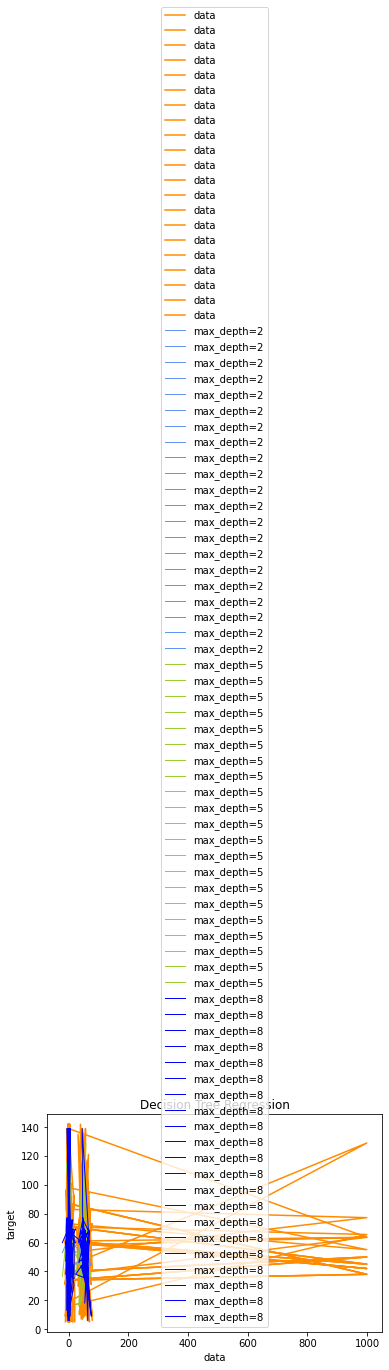

In [130]:
# Plot the results
plt.figure()
plt.plot(x_train, y_train, c="darkorange", label="data")
plt.plot(x_test, regr_1_result, color="cornflowerblue", label="max_depth=2", linewidth=1)
plt.plot(x_test, regr_2_result, color="yellowgreen", label="max_depth=5", linewidth=1)
plt.plot(x_test, regr_3_result, color="blue", label="max_depth=8", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [131]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
column_names = []
for column in pca_df.columns:
    column_names.append(column)

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regr_1, out_file ='depth2.dot',feature_names = column_names)
export_graphviz(regr_2, out_file ='depth5.dot',feature_names = column_names)
export_graphviz(regr_3, out_file ='depth8.dot',feature_names = column_names)

AttributeError: ignored

## Depth 2 ##

depth2.svg

## Depth 5 ##

depth 5.svg

## Depth 8 ##

depth8.svg

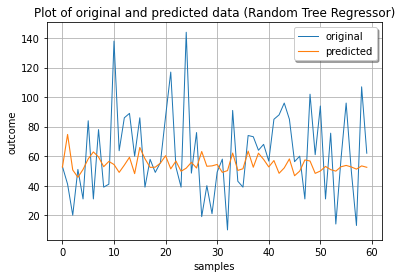

In [142]:
# Random Forest Plot
x_ax = range(len(x_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, rf_prediction, linewidth=1.1, label="predicted")
plt.title("Plot of original and predicted data (Random Tree Regressor)")
plt.xlabel('samples')
plt.ylabel('outcome')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [38]:
# MSE accuracy
mse_r1 = np.sqrt(mean_squared_error(regr_1_result,y_test))
mse_r2 = np.sqrt(mean_squared_error(regr_2_result,y_test))
mse_r3 = np.sqrt(mean_squared_error(regr_3_result,y_test))
mse_r3 = np.sqrt(mean_squared_error(regr_3_result,y_test))

print('The accuracy of r1 is {}', 100-mse_r1)
print('The accuracy of r2 is {}', 100-mse_r2)
print('The accuracy of r3 is {}', 100-mse_r3)

The accuracy of r1 is {} 68.7356477402422
The accuracy of r2 is {} 63.49701979759177
The accuracy of r3 is {} 63.096295306041576


## ANN Models

In [197]:
# create ANN model
model = Sequential()

# Define input layer
model.add(Dense(units=1024, input_dim=21, kernel_initializer='normal', activation='softmax'))

# Define second layer
model.add(Dense(units=256, activation='relu'))

# Define third layer
model.add(Dense(units=64, activation='relu'))

# The output neuron is a single fully connected node (predict a single number)
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Fit ANN to a training set
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 15, epochs = 20, verbose=2)

Epoch 1/20
23/23 - 1s - loss: 54.5708 - val_loss: 60.5541 - 1s/epoch - 57ms/step
Epoch 2/20
23/23 - 0s - loss: 51.1539 - val_loss: 54.1651 - 263ms/epoch - 11ms/step
Epoch 3/20
23/23 - 0s - loss: 41.1663 - val_loss: 38.7327 - 246ms/epoch - 11ms/step
Epoch 4/20
23/23 - 0s - loss: 25.3223 - val_loss: 23.5819 - 257ms/epoch - 11ms/step
Epoch 5/20
23/23 - 0s - loss: 20.6538 - val_loss: 23.0158 - 231ms/epoch - 10ms/step
Epoch 6/20
23/23 - 0s - loss: 20.2944 - val_loss: 22.9866 - 269ms/epoch - 12ms/step
Epoch 7/20
23/23 - 0s - loss: 20.1678 - val_loss: 23.1132 - 202ms/epoch - 9ms/step
Epoch 8/20
23/23 - 0s - loss: 20.1213 - val_loss: 22.9144 - 146ms/epoch - 6ms/step
Epoch 9/20
23/23 - 0s - loss: 20.0838 - val_loss: 22.8443 - 136ms/epoch - 6ms/step
Epoch 10/20
23/23 - 0s - loss: 20.1148 - val_loss: 23.1166 - 157ms/epoch - 7ms/step
Epoch 11/20
23/23 - 0s - loss: 20.1021 - val_loss: 22.7876 - 155ms/epoch - 7ms/step
Epoch 12/20
23/23 - 0s - loss: 19.9681 - val_loss: 23.4711 - 144ms/epoch - 6ms/ste

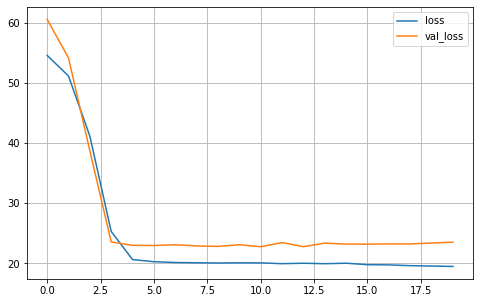

In [198]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [199]:
score = model.evaluate(x_test, y_test, verbose=1)
print(score)

2/2 [==============================] - 0s 7ms/step - loss: 23.5425
23.542512893676758


In [26]:
predictions = model.predict(x_test)
predictions = predictions.ravel()

2/2 [==============================] - 0s 5ms/step


In [27]:
#MSE Evaluation
mse = ((y_test - predictions)**2).mean(axis=None)
print(mse)

1036.4891042532456


In [67]:
model.save_weights('neural_network_regression.h5')

## Lasso Model
(code ref from 'https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/')

In [28]:
reg = Lasso(alpha=1)
reg.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.381e+03, tolerance: 2.328e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [29]:
print('R squared training set', round(reg.score(x_train, y_train)*100, 2))
print('R squared test set', round(reg.score(x_test, y_test)*100, 2))

R squared training set 8.29
R squared test set -10.79


In [49]:
# Training data
pred_train = reg.predict(x_train)
mae_train = mean_absolute_error (y_train, pred_train)
print('MAE training set', round(mae_train, 2))

# Test data
pred = reg.predict(x_test)
mae_train =mean_absolute_error (y_test, pred)
print('MAE test set', round(mae_train, 2))

MAE training set 19.69
MAE test set 24.64


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+05, tolerance: 2.328e+01
  model = cd_fast.enet_coordinate_descent(


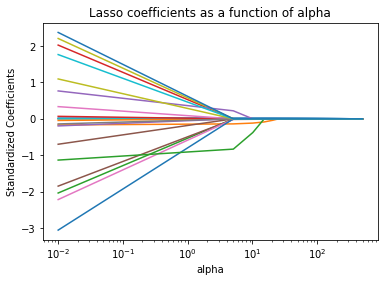

In [50]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [51]:
# Find optimal alpha

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=42, max_iter=150000)

# Fit model
model.fit(x_train, y_train)

model.alpha_

4.800484688576488

In [52]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(x_train, y_train)

Lasso(alpha=4.800484688576488)

In [53]:
print(list(zip(lasso_best.coef_, pca_df)))

[(0.022820924729412745, 'pCR (outcome)'), (-0.13922257711800867, 'Age'), (0.0, 'ER'), (-0.0, 'PgR'), (-0.0, 'HER2'), (-0.01533261301583438, 'TrippleNegative'), (-0.010401782500929161, 'ChemoGrade'), (-0.0, 'Proliferation'), (-0.0, 'HistologyType'), (-0.003004477620185636, 'LNStatus'), (-0.0, 'TumourStage'), (-0.0, 'pca 0'), (-0.8548186300954783, 'pca 1'), (-0.0, 'pca 2'), (0.24220230450356, 'pca 3'), (-0.0, 'pca 4'), (0.0, 'pca 5'), (-0.0, 'pca 6'), (0.0, 'pca 7'), (0.0, 'pca 8'), (0.0, 'pca 9')]


In [54]:
print('R squared training set', round(lasso_best.score(x_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(x_test, y_test)*100, 2))

R squared training set 5.06
R squared test set -7.89


In [55]:
mean_absolute_error(y_test, lasso_best.predict(x_test))

24.052488254310408

## K-fold validation (Decision Trees)

In [117]:
# K-fold cross validation for Decision Tree models
models = []
models.append(("Depth 2", regr_1))
models.append(("Depth 5", regr_2))
models.append(("Depth 8", regr_3))
models.append(("Random Forest", rf))

num_folds = 5
results = []
names = []

for name, model in models:
    kf = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, x_train, y_train, cv=kf, n_jobs=-1, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)

print("5-Fold cross-validation mean absolute error for the training data for all DT models")

for name, cv_results in zip(names, results):
    print("%-10s: %.6f (%.6f)" % (name, abs(cv_results.mean()), cv_results.std()))

5-Fold cross-validation mean absolute error for the training data for all DT models
Depth 2   : 21.331985 (1.005207)
Depth 5   : 23.435294 (0.925354)
Depth 8   : 26.315074 (1.119331)
Random Forest: 20.051910 (1.528206)


In [118]:
for name, model in models:
  mae = mean_absolute_error(y_test, model.predict(x_test))
  print(mae)

24.766666666666666
29.053472222222222
29.62152777777778
23.461541792327594
